<a href="https://colab.research.google.com/github/vinay-852/classifier-CvsB/blob/main/Project_ChestvsBrain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
!gdown --id 1pxsHCA6EGQ1iFRGpqa8tXGjjRXoemQ0C -O /content/data.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pxsHCA6EGQ1iFRGpqa8tXGjjRXoemQ0C
To: /content/data.zip
100% 4.53M/4.53M [00:00<00:00, 28.2MB/s]


In [3]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/Test/
   creating: data/Train/
  inflating: data/Test/chest3.dcm    
  inflating: __MACOSX/data/Test/._chest3.dcm  
  inflating: data/Test/chest2.dcm    
  inflating: __MACOSX/data/Test/._chest2.dcm  
  inflating: data/Test/Brain.dcm     
  inflating: __MACOSX/data/Test/._Brain.dcm  
  inflating: data/Test/chest1.dcm    
  inflating: __MACOSX/data/Test/._chest1.dcm  
  inflating: data/Test/.DS_Store     
  inflating: __MACOSX/data/Test/._.DS_Store  
  inflating: data/Train/.DS_Store    
  inflating: __MACOSX/data/Train/._.DS_Store  
   creating: data/Train/Chest/
   creating: data/Train/brain/
  inflating: data/Train/Chest/1-007.dcm  
  inflating: __MACOSX/data/Train/Chest/._1-007.dcm  
  inflating: data/Train/Chest/1-006.dcm  
  inflating: __MACOSX/data/Train/Chest/._1-006.dcm  
  inflating: data/Train/Chest/1-004.dcm  
  inflating: __MACOSX/d

In [4]:
!rm /content/data.zip
!rm -rf /content/sample_data
!rm -rf /content/__MACOSX

In [6]:
%pip install pydicom opencv-python numpy scikit-learn xgboost mahotas matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 20.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.8/5.8 MB 27.1 MB/s eta 0:00:00


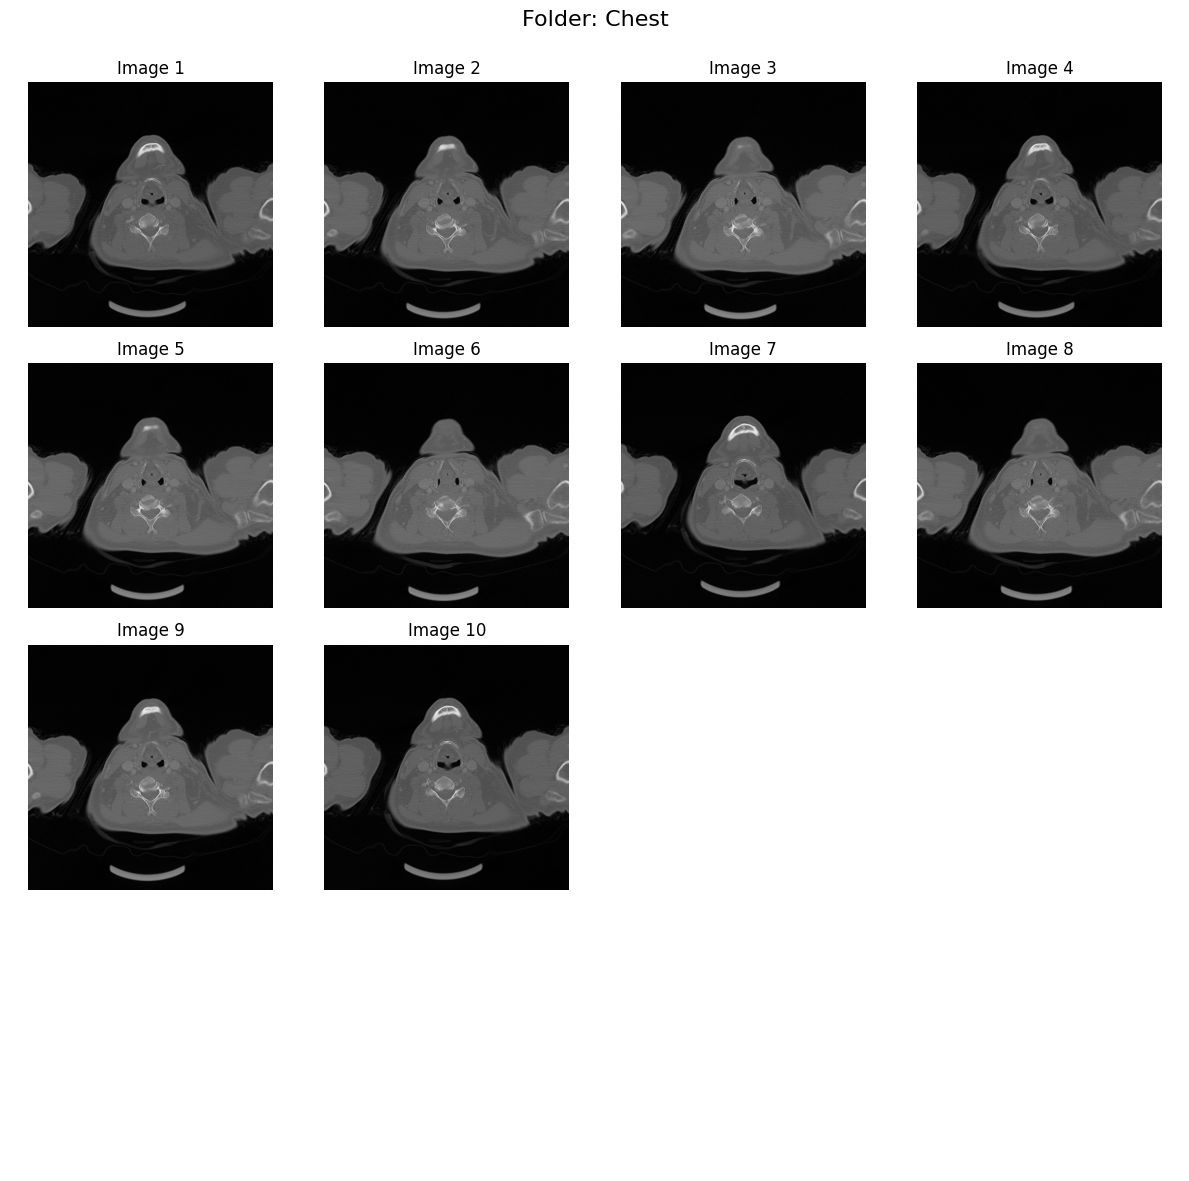

In [9]:
import pydicom
import matplotlib.pyplot as plt
import os
import math

# Directory containing DICOM images
dicom_dir = "/content/data/Train/Chest"

# Get list of all DICOM files
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]

# Extract folder name
folder_name = os.path.basename(dicom_dir)

# Set up grid size (adjust based on number of images)
num_images = len(dicom_files)
grid_size = math.ceil(math.sqrt(num_images))  # Square-like grid

# Create figure
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle(f"Folder: {folder_name}", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through images and display them
for i, dicom_file in enumerate(dicom_files):
    dicom_image = pydicom.dcmread(dicom_file)
    axes[i].imshow(dicom_image.pixel_array, cmap="gray")
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


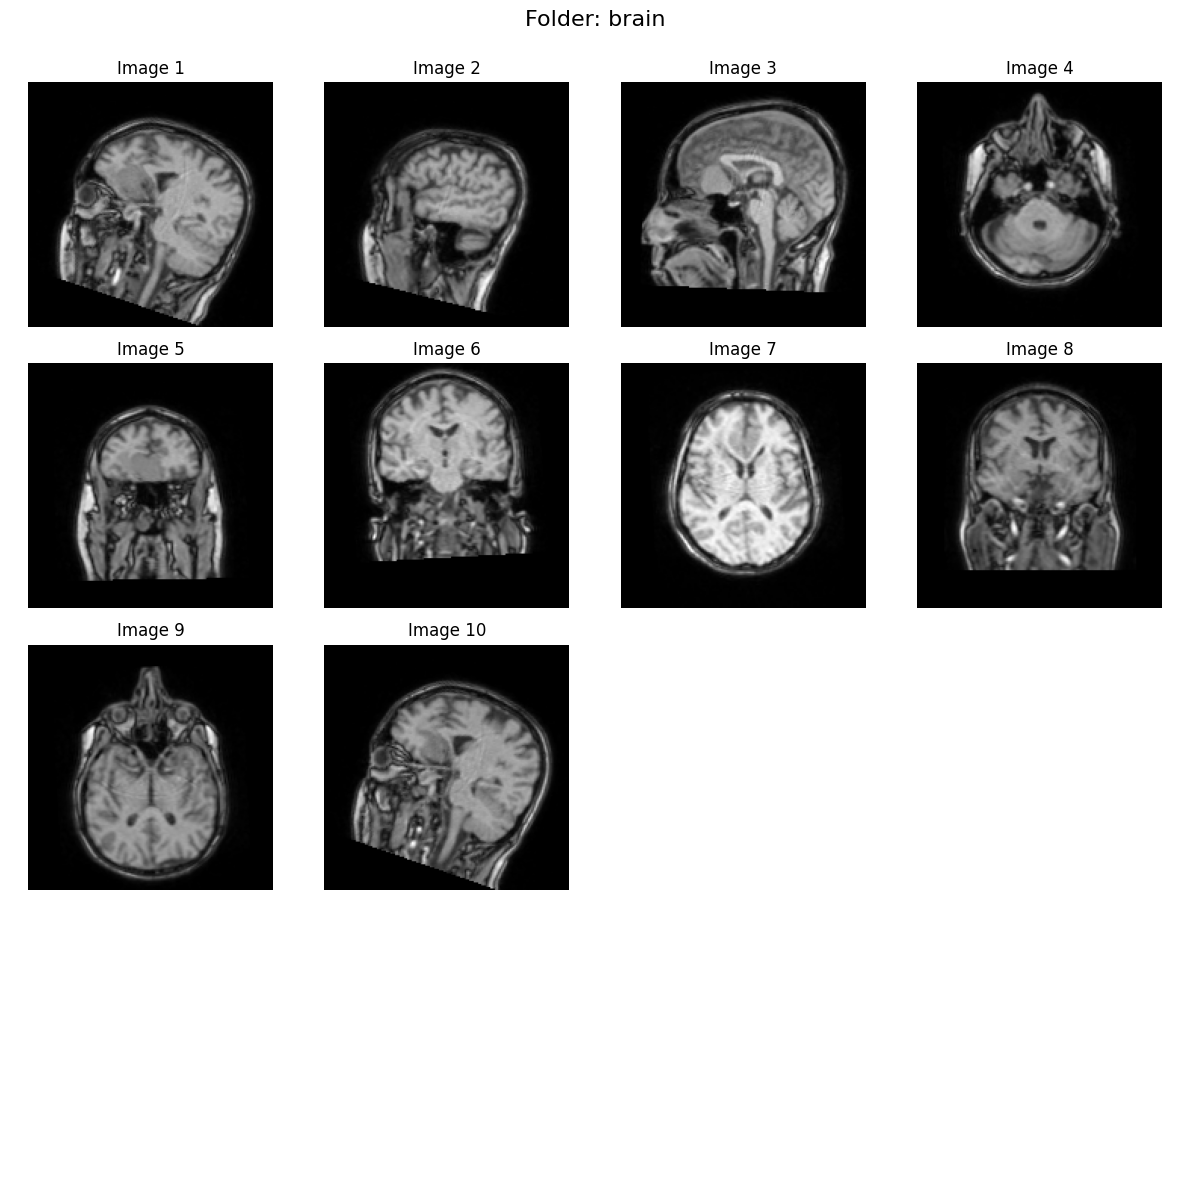

In [10]:
import pydicom
import matplotlib.pyplot as plt
import os
import math

# Directory containing DICOM images
dicom_dir = "/content/data/Train/brain"

# Get list of all DICOM files
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]

# Extract folder name
folder_name = os.path.basename(dicom_dir)

# Set up grid size (adjust based on number of images)
num_images = len(dicom_files)
grid_size = math.ceil(math.sqrt(num_images))  # Square-like grid

# Create figure
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle(f"Folder: {folder_name}", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through images and display them
for i, dicom_file in enumerate(dicom_files):
    dicom_image = pydicom.dcmread(dicom_file)
    axes[i].imshow(dicom_image.pixel_array, cmap="gray")
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


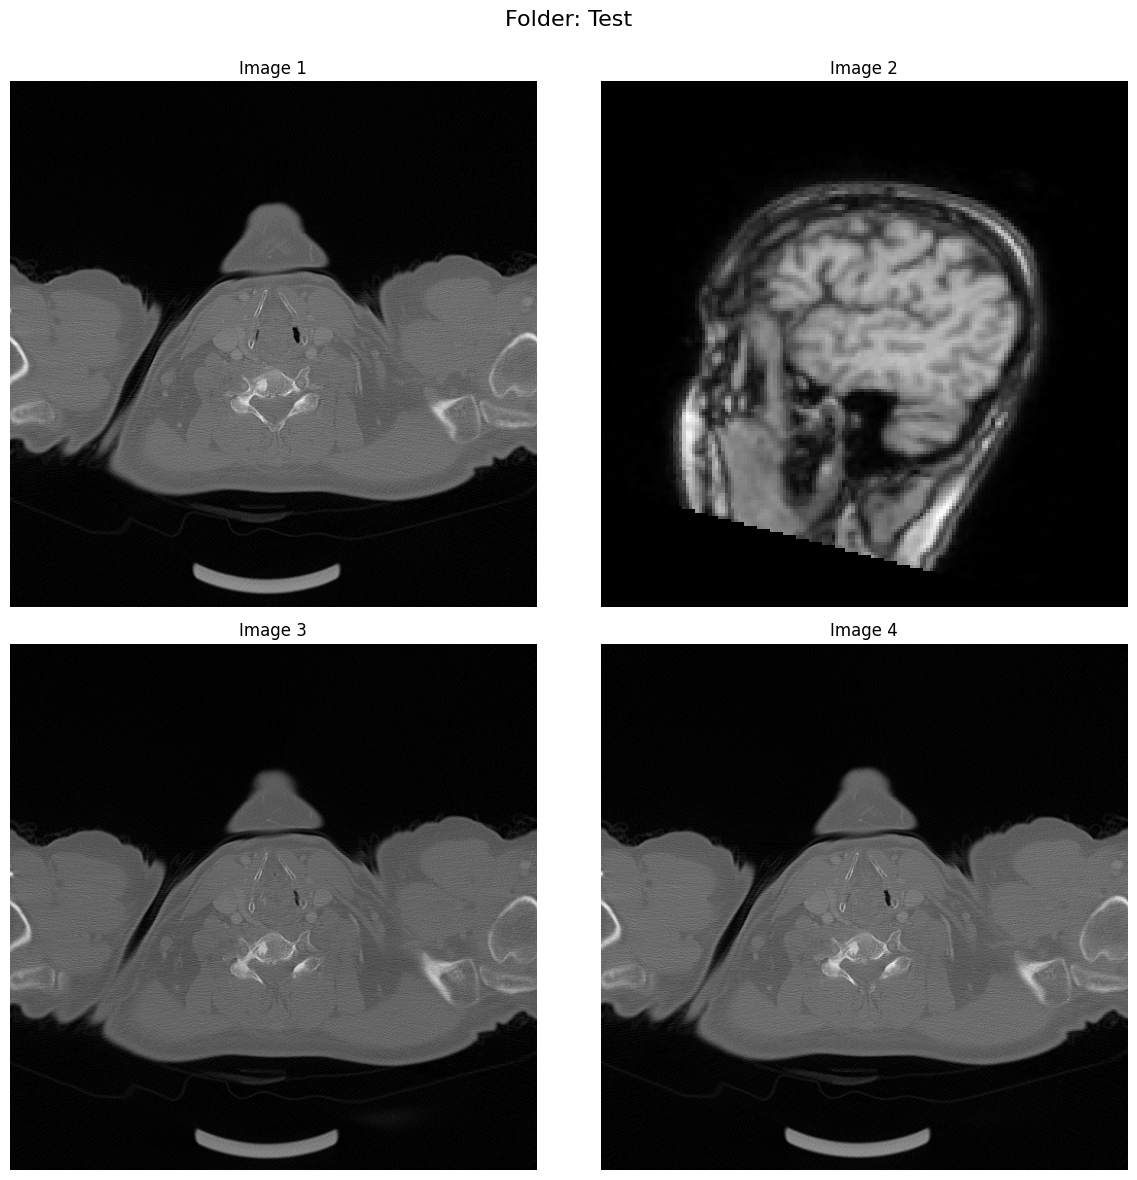

In [11]:
import pydicom
import matplotlib.pyplot as plt
import os
import math

# Directory containing DICOM images
dicom_dir = "/content/data/Test"

# Get list of all DICOM files
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")]

# Extract folder name
folder_name = os.path.basename(dicom_dir)

# Set up grid size (adjust based on number of images)
num_images = len(dicom_files)
grid_size = math.ceil(math.sqrt(num_images))  # Square-like grid

# Create figure
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle(f"Folder: {folder_name}", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through images and display them
for i, dicom_file in enumerate(dicom_files):
    dicom_image = pydicom.dcmread(dicom_file)
    axes[i].imshow(dicom_image.pixel_array, cmap="gray")
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


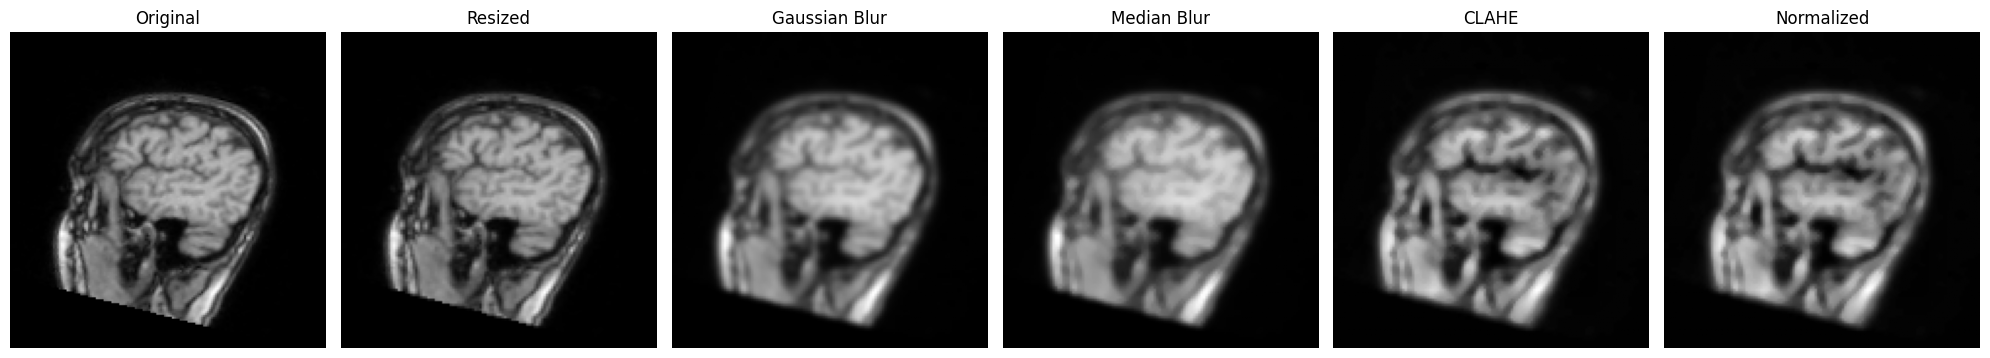

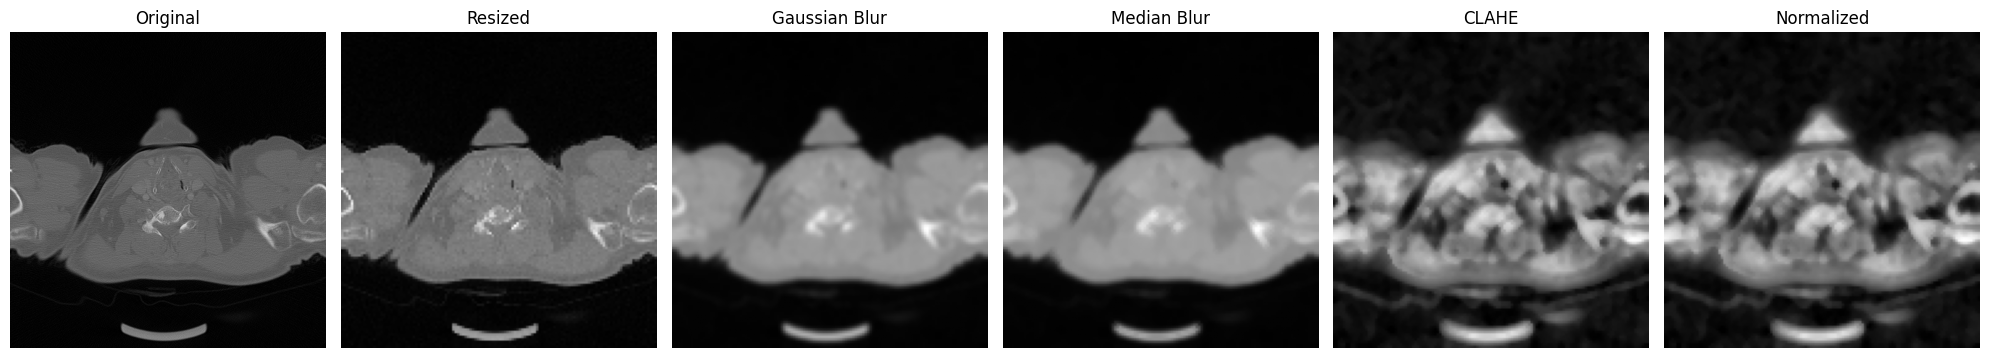

In [13]:
import os
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Parameters
IMG_SIZE = 128

# Function to visualize each preprocessing step
def visualize_preprocessing(image_path):
    # Load the DICOM image
    dicom_data = pydicom.dcmread(image_path)
    original_img = dicom_data.pixel_array

    # Step 1: Resize
    resized_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

    # Step 2: Gaussian Blur (reduces noise)
    gaussian_img = cv2.GaussianBlur(resized_img, (5, 5), 0)

    # Step 3: Median Blur (preserves edges)
    median_img = cv2.medianBlur(gaussian_img, 3)

    # Step 4: Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(median_img)

    # Step 5: Normalize image (scale pixel values to [0, 1])
    normalized_img = clahe_img / 255.0

    # Create a figure to show each step
    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    axs[0].imshow(original_img, cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(resized_img, cmap='gray')
    axs[1].set_title("Resized")
    axs[1].axis("off")

    axs[2].imshow(gaussian_img, cmap='gray')
    axs[2].set_title("Gaussian Blur")
    axs[2].axis("off")

    axs[3].imshow(median_img, cmap='gray')
    axs[3].set_title("Median Blur")
    axs[3].axis("off")

    axs[4].imshow(clahe_img, cmap='gray')
    axs[4].set_title("CLAHE")
    axs[4].axis("off")

    axs[5].imshow(normalized_img, cmap='gray')
    axs[5].set_title("Normalized")
    axs[5].axis("off")

    plt.tight_layout()
    plt.show()

# Replace with the path to your test DICOM file
test_image_path1 = "/content/data/Test/Brain.dcm"
visualize_preprocessing(test_image_path1)
test_image_path2 = "/content/data/Test/chest1.dcm"
visualize_preprocessing(test_image_path2)

In [14]:
import os
import pydicom
import cv2
import numpy as np
import mahotas as mt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:

main_dir = "/content/data/Train"

CLASS_NAMES = [f for f in sorted(os.listdir(main_dir)) if os.path.isdir(os.path.join(main_dir, f))]
print("Classes:", CLASS_NAMES)

IMG_SIZE = 128  # Resize images

# Apply preprocessing filters
def preprocess_image(img):
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    img = cv2.GaussianBlur(img, (5, 5), 0)  # Gaussian Blur (removes noise)
    img = cv2.medianBlur(img, 3)  # Median Filtering (preserves edges)

    # Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)

    img = img / 255.0  # Normalize
    return img

Classes: ['Chest', 'brain']


In [16]:
# Load DICOM images
def load_dicom_images(main_dir):
    images, labels = [], []
    for label, class_name in enumerate(CLASS_NAMES):
        folder_path = os.path.join(main_dir, class_name)
        for file in os.listdir(folder_path):
            if file.endswith(".dcm"):
                dicom_path = os.path.join(folder_path, file)
                dicom_data = pydicom.dcmread(dicom_path)
                img = dicom_data.pixel_array
                img = preprocess_image(img)  # Apply filters
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [17]:

# Load dataset
X, y = load_dicom_images(main_dir)

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üèó Feature Extraction (HOG + GLCM)
def extract_features(images):
    features = []
    for img in images:
        # Histogram of Oriented Gradients (HOG)
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

        # Gray-Level Co-occurrence Matrix (GLCM)
        glcm = mt.features.haralick(img.astype(np.uint8))
        glcm_mean = glcm.mean(axis=0)  # Take the mean of the features

        # Combine features
        combined_features = np.hstack((hog_features, glcm_mean))
        features.append(combined_features)

    return np.array(features)

# Extract features from training and test sets
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Train an XGBoost Model
clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:51:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred, target_names=CLASS_NAMES))

Accuracy: 1.0
 Classification Report:
               precision    recall  f1-score   support

       Chest       1.00      1.00      1.00         2
       brain       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [20]:
def predict_dicom(image_path):
    dicom_data = pydicom.dcmread(image_path)
    img = dicom_data.pixel_array
    img = preprocess_image(img)  # Apply preprocessing

    # Extract features
    hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    glcm = mt.features.haralick(img.astype(np.uint8))
    glcm_mean = glcm.mean(axis=0)
    combined_features = np.hstack((hog_features, glcm_mean))

    # Normalize
    combined_features = scaler.transform([combined_features])

    # Predict class
    class_index = clf.predict(combined_features)[0]
    return CLASS_NAMES[class_index]


In [21]:
test_image = "/content/data/Test/Brain.dcm"
print("Predicted Class:", predict_dicom(test_image))

üîç Predicted Class: brain


In [22]:
test_image = "/content/data/Test/chest1.dcm"
print("Predicted Class:", predict_dicom(test_image))

Predicted Class: Chest


In [23]:
test_image = "/content/data/Test/chest2.dcm"
print("Predicted Class:", predict_dicom(test_image))

Predicted Class: Chest


In [24]:
test_image = "/content/data/Test/chest3.dcm"
print("Predicted Class:", predict_dicom(test_image))

Predicted Class: Chest
